# Deep and Reinforcement Learning

## (Book: Mastering Machine Learning with Python in Six Steps)

## CNN on CIFAR10 Dataset

In [1]:
import keras
from keras import backend as K
from keras.models import Sequential
from keras.datasets import cifar10
from keras.layers import Dense, Activation, Flatten
from keras.optimizers import Adadelta
from keras.utils import np_utils
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.utils.vis_utils import model_to_dot

import numpy as np
np.random.seed(2017)

from IPython.display import SVG
from matplotlib import pyplot as plt
import matplotlib.image as mpimg

2022-09-21 21:10:59.913543: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-21 21:10:59.913654: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
batch_size = 256
nb_classes = 10
nb_epoch = 4
nb_filters = 10
nb_pool = 2 # window size of pooling
nb_conv = 3 # window or kernel size of filter
img_rows, img_cols = 32, 32
img_channels = 3

input_shape = (img_rows, img_cols, 3)

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

X_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [3]:
# Model Configuration
# define two groups of layers: feature (convolutions) and classification (dense)
feature_layers = [
    Convolution2D(nb_filters, nb_conv, nb_conv, input_shape=input_shape),
    Activation('relu'),
    Convolution2D(nb_filters, nb_conv, nb_conv),
    Activation('relu'),
    MaxPooling2D(pool_size=(nb_pool, nb_pool)),
    Flatten(), 
]

classification_layers = [
    Dense(512),
    Activation('relu'),
    Dense(nb_classes),
    Activation('softmax')
]
# create complete model
model = Sequential(feature_layers + classification_layers)
model.compile(loss='categorical_crossentropy', optimizer="adadelta",
metrics=['accuracy'])
# print model layer summary
print(model.summary())

2022-09-21 21:11:46.737227: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-09-21 21:11:46.803183: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-09-21 21:11:46.803340: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (arch): /proc/driver/nvidia/version does not exist


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 10, 10, 10)        280       
                                                                 
 activation (Activation)     (None, 10, 10, 10)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 3, 3, 10)          910       
                                                                 
 activation_1 (Activation)   (None, 3, 3, 10)          0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 1, 1, 10)         0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 10)                0         
                                                        

In [4]:
# fit model
model.fit(
    X_train, 
    Y_train, 
    batch_size=batch_size, 
    epochs=nb_epoch,
    validation_data=(X_test, Y_test)
)

2022-09-21 21:11:51.560190: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 614400000 exceeds 10% of free system memory.


Epoch 1/4
 14/196 [=>............................] - ETA: 2s - loss: 2.3063 - accuracy: 0.0929

2022-09-21 21:12:47.278035: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 21394800 exceeds 10% of free system memory.
2022-09-21 21:12:47.297608: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 21394800 exceeds 10% of free system memory.
2022-09-21 21:12:47.310675: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 21394800 exceeds 10% of free system memory.
2022-09-21 21:12:47.322566: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 21394800 exceeds 10% of free system memory.


196/196 [==============================] - 21s 65ms/step - loss: 2.3059 - accuracy: 0.0957 - val_loss: 2.3057 - val_accuracy: 0.1007
Epoch 2/4
196/196 [==============================] - 3s 14ms/step - loss: 2.3056 - accuracy: 0.0996 - val_loss: 2.3054 - val_accuracy: 0.1051
Epoch 3/4
196/196 [==============================] - 3s 16ms/step - loss: 2.3053 - accuracy: 0.1027 - val_loss: 2.3051 - val_accuracy: 0.1089
Epoch 4/4
196/196 [==============================] - 3s 17ms/step - loss: 2.3050 - accuracy: 0.1059 - val_loss: 2.3048 - val_accuracy: 0.1130


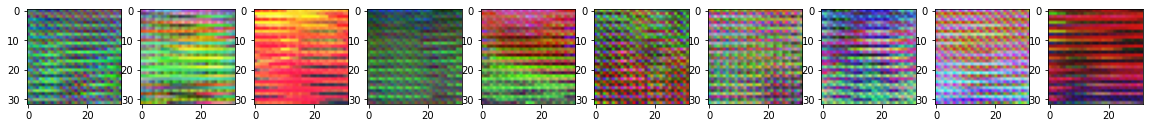

In [5]:
def draw(data, row, col, n):
    plt.subplot(row, col, n)
    plt.imshow(data)
    
# Input layer (original image)
show_size = 10
plt.figure(figsize=(20,20))

for i in range(show_size):
    draw(X_train[i].reshape(3, 32, 32).transpose(1, 2, 0), 1, show_size,i+1)
    
plt.show()

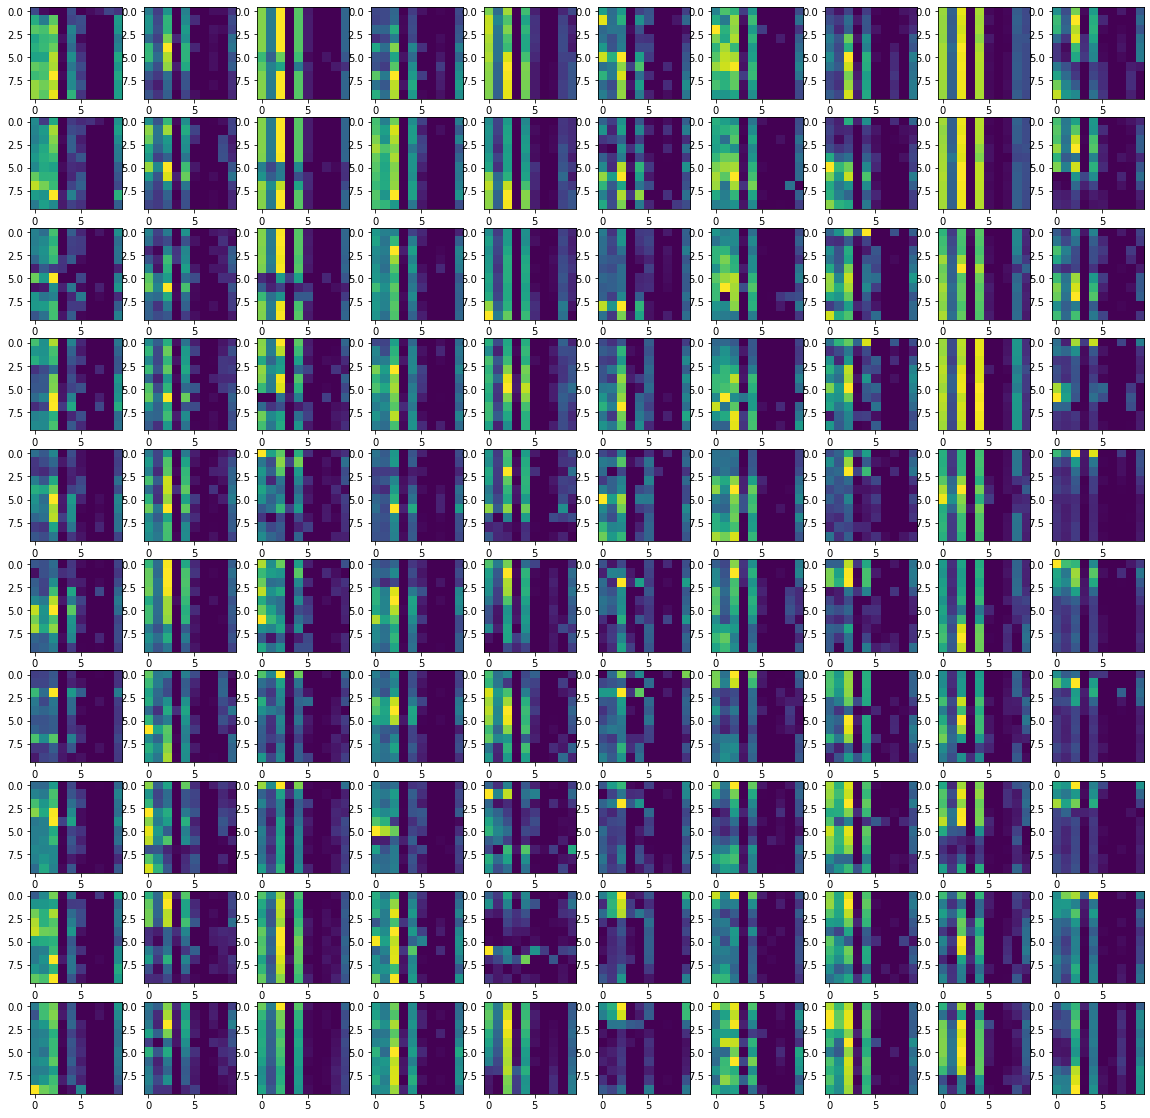

In [6]:
# first layer
get_first_layer_output = K.function([model.layers[0].input], [model.
layers[1].output])
first_layer = get_first_layer_output([X_train[0:show_size]])[0]
plt.figure(figsize=(20,20))
for img_index, filters in enumerate(first_layer, start=1):
    for filter_index, mat in enumerate(filters):
        pos = (filter_index)*show_size+img_index
        draw(mat, nb_filters, show_size, pos)
plt.show()

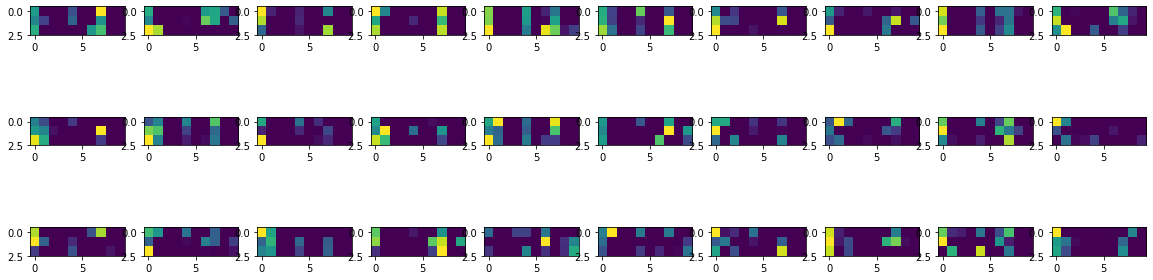

In [7]:
# Second layer
get_second_layer_output = K.function([model.layers[0].input],
                          [model.layers[3].output])
second_layers = get_second_layer_output([X_train[0:show_size]])[0]
plt.figure(figsize=(20,20))
for img_index, filters in enumerate(second_layers, start=1):
    for filter_index, mat in enumerate(filters):
        pos = (filter_index)*show_size+img_index
        draw(mat, nb_filters, show_size, pos)
plt.show()

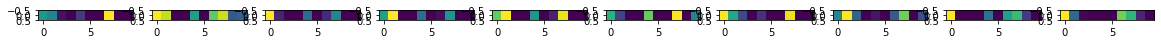

In [8]:
# Third layer
get_third_layer_output = K.function([model.layers[0].input],
         [model.layers[4].output])
third_layers = get_third_layer_output([X_train[0:show_size]])[0]
plt.figure(figsize=(20,20))
for img_index, filters in enumerate(third_layers, start=1):
    for filter_index, mat in enumerate(filters):
        pos = (filter_index)*show_size+img_index
        mat_size = mat.shape[1]
        draw(mat, nb_filters, show_size, pos)
plt.show()

## CNN on MNIST Dataset

In [9]:
import keras
keras.backend.backend()

# using theano has backend
K = keras.backend.backend()

In [10]:
from matplotlib import pyplot as plt

import numpy as np
np.random.seed(2017)

from keras import backend as K
from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Dense, Dropout, Activation, Convolution2D, MaxPooling2D, Flatten
from keras.utils import np_utils
from keras.utils.vis_utils import plot_model
from keras.preprocessing import sequence
from keras import backend as K
from IPython.display import SVG, display
from keras.utils.vis_utils import model_to_dot

In [11]:
img_rows, img_cols = 28, 28
nb_classes = 10
nb_filters = 5 # the number of filters
nb_pool = 2 # window size of pooling
nb_conv = 3 # window or kernel size of filter
nb_epoch = 5

input_shape = (img_rows, img_cols, 1)

# data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
# X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')


# Set input shape
sample_shape = X_train[0].shape
img_width, img_height = sample_shape[0], sample_shape[1]
input_shape = (img_width, img_height, 1)

# Reshape data 
X_train = X_train.reshape(len(X_train), input_shape[0], input_shape[1], input_shape[2])
X_test  = X_test.reshape(len(X_test), input_shape[0], input_shape[1], input_shape[2])


X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [12]:
# define two groups of layers: feature (convolutions) and classification(dense)
feature_layers = [
    Convolution2D(nb_filters, nb_conv, nb_conv, input_shape=input_shape),
    Activation('relu'),
    Convolution2D(nb_filters, nb_conv, nb_conv),
    Activation('relu'),
    MaxPooling2D(pool_size=(nb_pool, nb_pool)),
    Dropout(0.25),
    Flatten(),
]
classification_layers = [
    Dense(128),
    Activation('relu'),
    Dropout(0.5),
    Dense(nb_classes),
    Activation('softmax')
]
# create complete model
model = Sequential(feature_layers + classification_layers)

# define two groups of layers: feature (convolutions) and classification(dense)
feature_layers = [
    Convolution2D(nb_filters, nb_conv, nb_conv, input_shape=input_shape),
    Activation('relu'),
    Convolution2D(nb_filters, nb_conv, nb_conv),
    Activation('relu'),
    MaxPooling2D(pool_size=(nb_pool, nb_pool)),
    Dropout(0.25),
    Flatten(),
]

classification_layers = [
    Dense(128),
    Activation('relu'),
    Dropout(0.5),
    Dense(nb_classes),
    Activation('softmax')
]

# create complete model
model = Sequential(feature_layers + classification_layers)
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 9, 9, 5)           50        
                                                                 
 activation_8 (Activation)   (None, 9, 9, 5)           0         
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 5)           230       
                                                                 
 activation_9 (Activation)   (None, 3, 3, 5)           0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 5)          0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 1, 1, 5)           0         
                                                      

In [13]:
model.compile(
    optimizer='adam', 
    loss='mean_absolute_error', 
    metrics=['mean_absolute_error']
)

model.fit(X_train, Y_train, epochs=nb_epoch, batch_size=256,verbose=2, validation_split=0.2)

Epoch 1/5
188/188 - 4s - loss: 0.1670 - mean_absolute_error: 0.1670 - val_loss: 0.1414 - val_mean_absolute_error: 0.1414 - 4s/epoch - 19ms/step
Epoch 2/5
188/188 - 2s - loss: 0.1425 - mean_absolute_error: 0.1425 - val_loss: 0.1162 - val_mean_absolute_error: 0.1162 - 2s/epoch - 11ms/step
Epoch 3/5
188/188 - 2s - loss: 0.1255 - mean_absolute_error: 0.1255 - val_loss: 0.1042 - val_mean_absolute_error: 0.1042 - 2s/epoch - 11ms/step
Epoch 4/5
188/188 - 2s - loss: 0.1187 - mean_absolute_error: 0.1187 - val_loss: 0.0997 - val_mean_absolute_error: 0.0997 - 2s/epoch - 10ms/step
Epoch 5/5
188/188 - 2s - loss: 0.1159 - mean_absolute_error: 0.1159 - val_loss: 0.0967 - val_mean_absolute_error: 0.0967 - 2s/epoch - 11ms/step


## Visualization of Layers

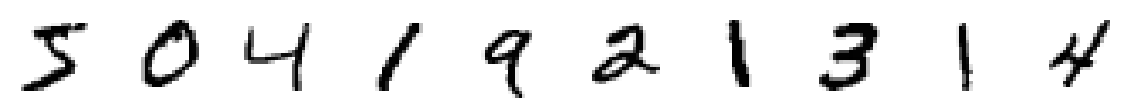

In [14]:
# visualization
def draw(data, row, col, n):
    plt.subplot(row, col, n)
    plt.imshow(data, cmap=plt.cm.gray_r)
    plt.axis('off')

# Sample input layer (original image)
show_size = 10
plt.figure(figsize=(20,20))
for i in range(show_size):
    draw(X_train[i].reshape(28,28), 1, show_size, i+1)

plt.show()

first layer shape:  (10, 9, 9, 5)


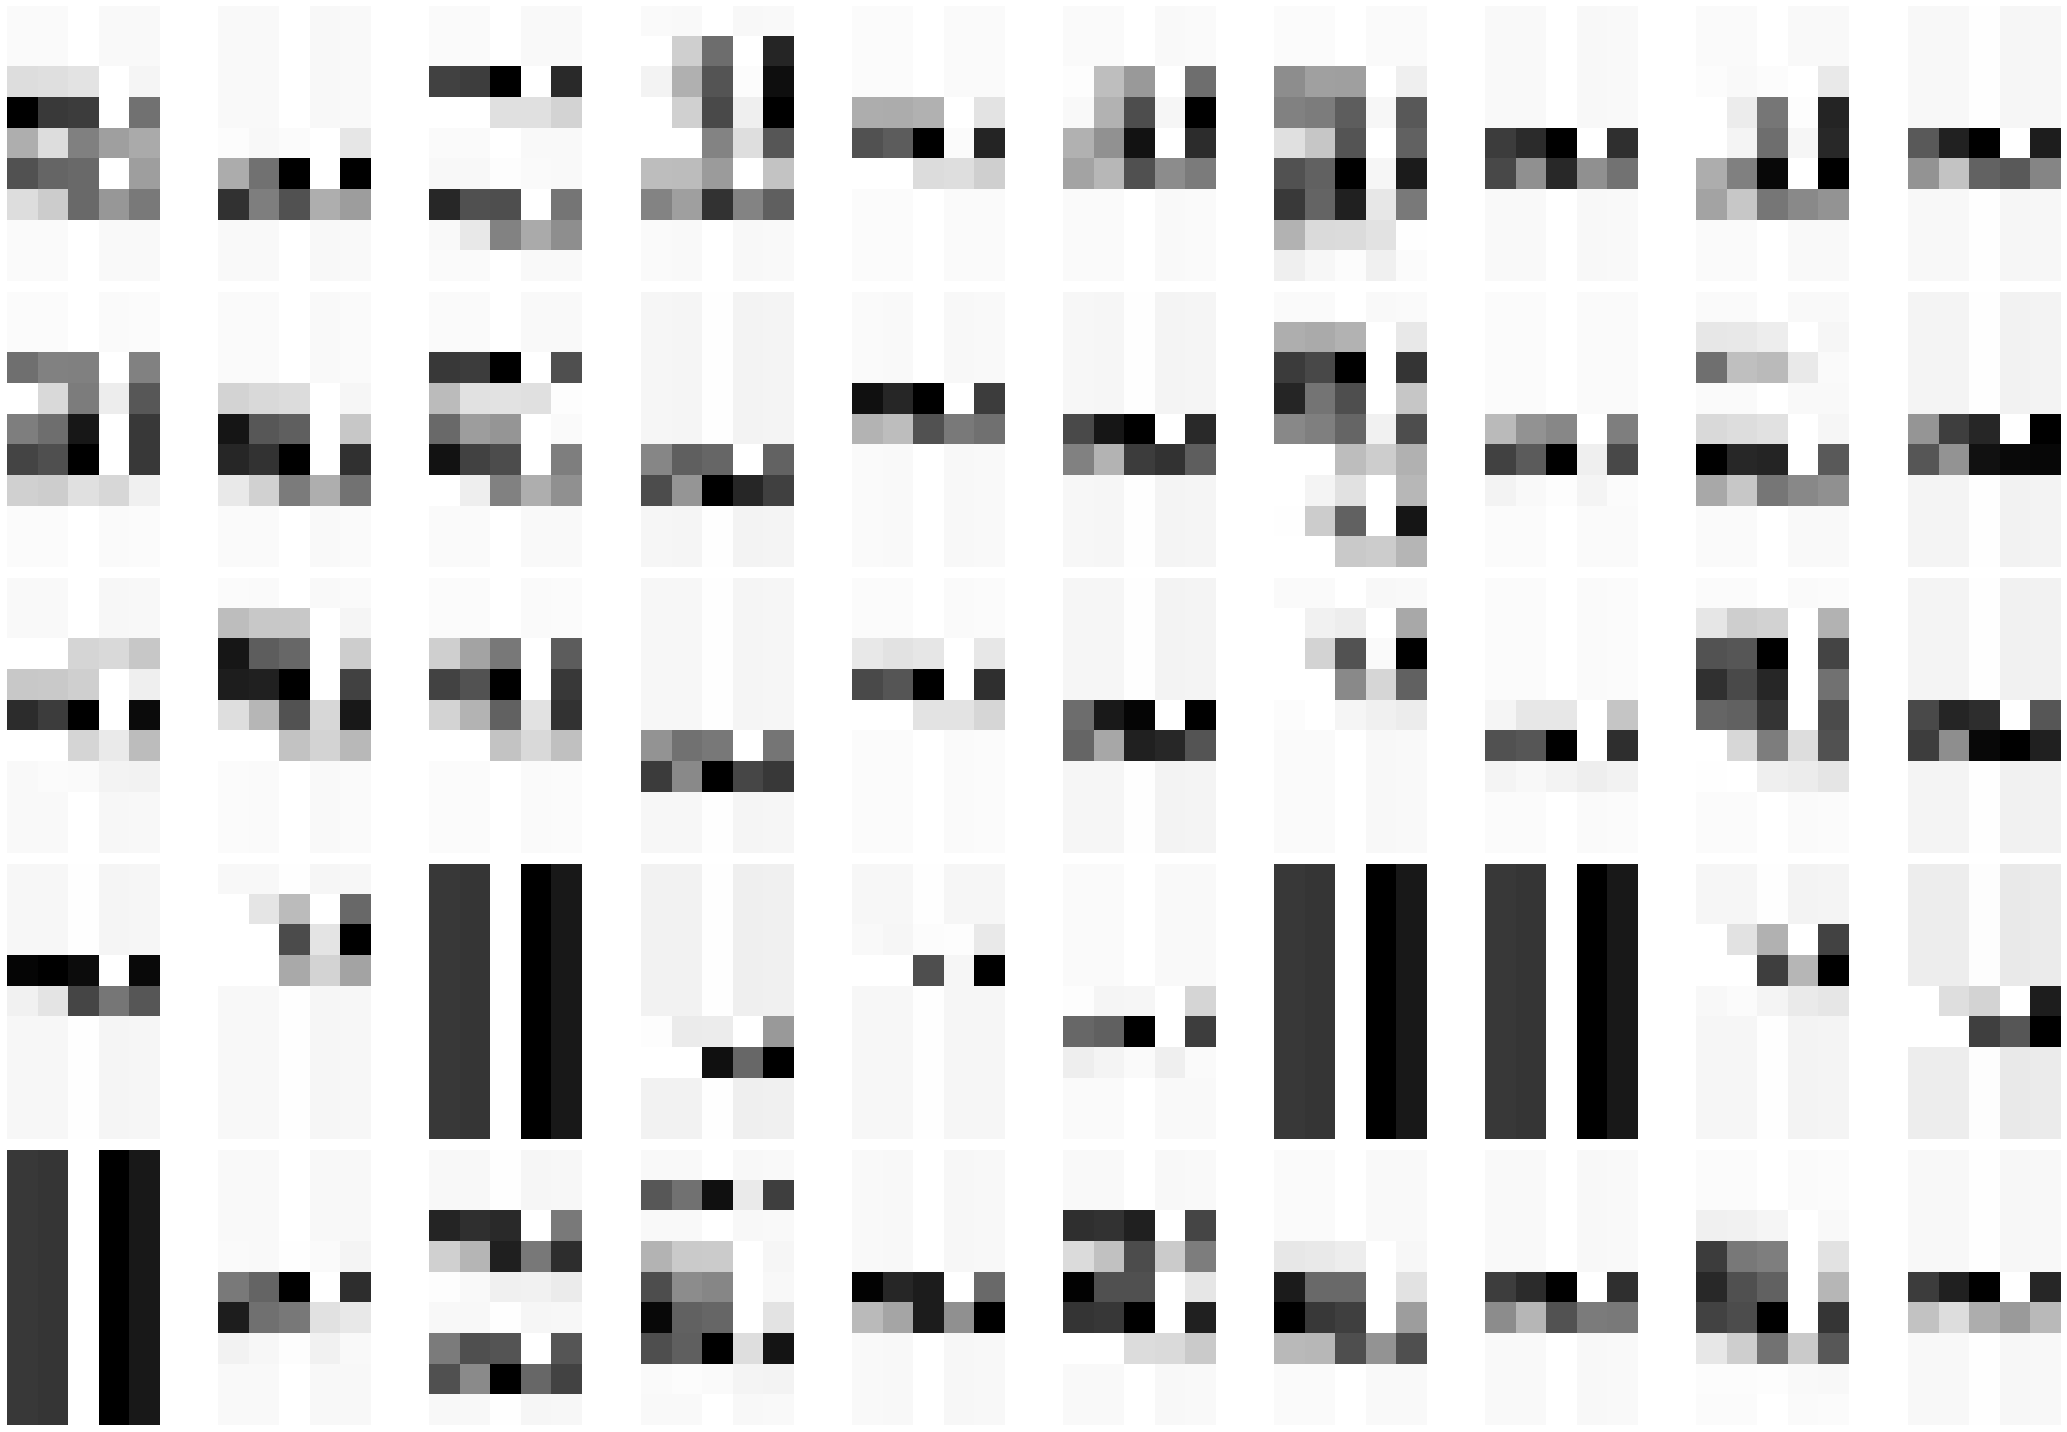

In [15]:
# First layer with 5 filters
get_first_layer_output = K.function([model.layers[0].input], [model.layers[1].output])
first_layer = get_first_layer_output([X_train[0:show_size]])[0]
plt.figure(figsize=(30,20))

print('first layer shape: ', first_layer.shape)

for img_index, filters in enumerate(first_layer, start=1):
    for filter_index, mat in enumerate(filters):
        pos = (filter_index)*10 + img_index
        pos = pos % 50 + 1
        draw(mat, nb_filters, show_size, pos)

plt.tight_layout()
plt.show()